## BAX 452 001-002 WQ 2024 Machine Learning
## Assignment 5
## Group 5
## Richard Liu, Hitesh Kunchakuri, Shivank Chandra

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


In [2]:
directory_path = '/Users/richardaliu/Downloads/Winter/BAX 452/HW 5'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/richardaliu/Downloads/Winter/BAX 452/HW 5


1.Data Exploration and Visualization (20)
Explore Event_entry(in Files) dataset.
Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
Include any other plots you find interesting and provide brief interpretations.


In [3]:
event_entry = 'Event_entry.csv'
df = pd.read_csv(event_entry)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


Database Information:

Order: Order of buying the tickets

Entry: 0 is denied, 1 is approved

Ticket class: 1.2.3 different types of tickets

Sex: Gender

Age: Age

Price: Price of Ticket

Name: Name of buyer

Ticket: Ticket number

Bank Balance: Bank balance of ticket buyer

In [5]:
print('Shape of dataframe\n',f'Rows: {df.shape[0]}\t',f'Columns: {df.shape[1]}')

Shape of dataframe
 Rows: 869	 Columns: 9


In [6]:
df.head()
df.tail()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
864,0,2,male,24.0,13,865,"Gill, Mr. John William",305015,87301
865,1,2,female,42.0,13,866,"Bystrom, Mrs. (Karolina)",459167,48146
866,1,2,female,27.0,14,867,"Duran y More, Miss. Asuncion",508948,60741
867,0,1,male,31.0,50,868,"Roebling, Mr. Washington Augustus II",942774,19589
868,0,3,male,NaN,10,869,"van Melkebeke, Mr. Philemon",498086,79973


In [7]:
df.describe()

,Entry,TicketClass,Age,Price,Order,Ticket Number,Bank Balance
count,869.000000,869.000000,694.000000,869.000000,869.000000,869.000000,869.000000
mean,0.384350,2.307250,29.732233,32.594937,435.000000,479171.174914,50269.125432
std,0.486721,0.836222,14.599438,50.186076,251.002988,286307.965548,28158.833520
min,0.000000,1.000000,0.420000,0.000000,1.000000,1222.000000,108.000000
25%,0.000000,2.000000,20.125000,8.000000,218.000000,228933.000000,27438.000000
50%,0.000000,3.000000,28.000000,14.000000,435.000000,453195.000000,50588.000000
75%,1.000000,3.000000,38.000000,31.000000,652.000000,722522.000000,73549.000000
max,1.000000,3.000000,80.000000,512.000000,869.000000,999921.000000,99548.000000


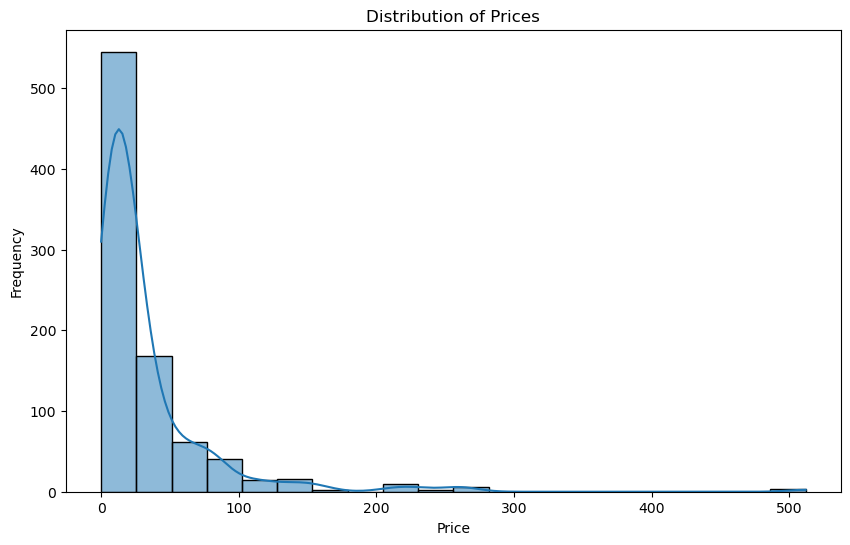

In [8]:
# 1. Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

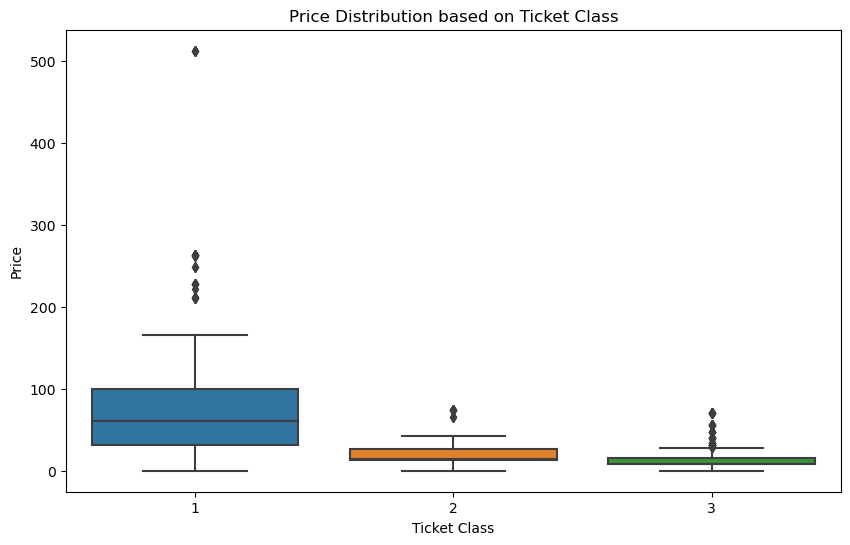

In [9]:
# 2. Boxplot for Ticket Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='TicketClass', y='Price', data=df)
plt.title('Price Distribution based on Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Price')
plt.show()

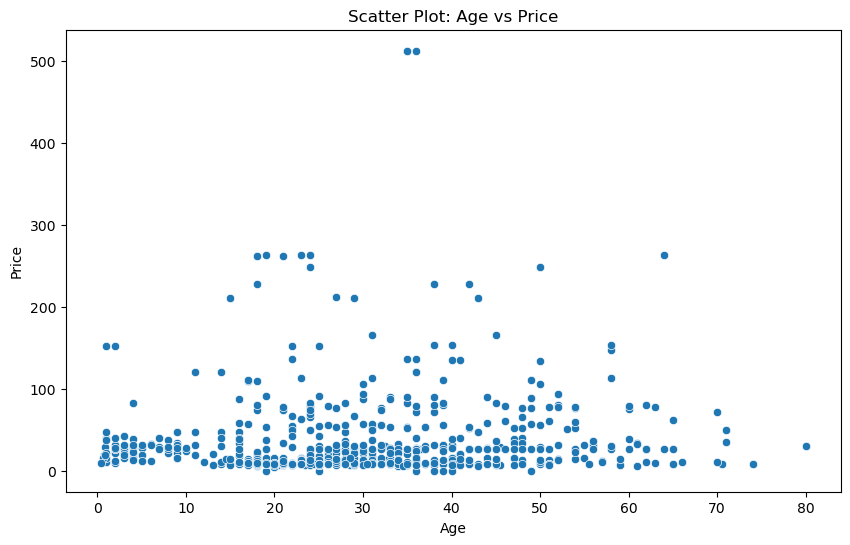

In [10]:
# 3. Scatter plot for Distance vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Scatter Plot: Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

Comment: 

We started by taking an overview of the entire dataset by pulling up its info and description. The histogram reveals that ticket prices are primarily concentrated around the $0 to $50 range. The boxplot indicates that first-class tickets cover the widest price range, suggesting they are typically more expensive than the other classes. From the scatter plot, we can observe that there's a good mix of ages across different ticket prices. However, it also appears that middle-aged individuals tend to spend more on tickets.

2.PCA Analysis (25)
Split the dataset into training and testing sets and encode the variables if needed.
Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions)
Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions
Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance.
Compare the OOS performance with that of a LASSO Logistic Regression Model.
(Tip: Many times, PCA reduces accuracy but the computation is much lighter and that is the tradeoff you can consider while building models in real life)

In [11]:
df.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

In [12]:
#drop unnecessary column
df.drop(['Name'], axis=1, inplace=True)

In [13]:
# converting all the categorical variables into dummy variables

df = pd.get_dummies(df,drop_first=True)

In [14]:
# Fill missing values in 'Age' column with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df.tail()

,Entry,TicketClass,Age,Price,Order,Ticket Number,Bank Balance,Sex_male
864,0,2,24.000000,13,865,305015,87301,True
865,1,2,42.000000,13,866,459167,48146,False
866,1,2,27.000000,14,867,508948,60741,False
867,0,1,31.000000,50,868,942774,19589,True
868,0,3,29.732233,10,869,498086,79973,True


In [16]:
X = df.drop('Entry', axis=1)
y = df['Entry']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pca_6 = PCA(n_components=6)

X_train_pca_6 = pca_6.fit_transform(X_train)
X_test_pca_6 = pca_6.transform(X_test)

pca_4 = PCA(n_components=4)
X_train_pca_4 = pca_4.fit_transform(X_train)
X_test_pca_4 = pca_4.transform(X_test)

pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)
X_test_pca_2 = pca_2.transform(X_test)

In [18]:
model = LinearRegression()

pca_list = [2, 4, 6]

for n in pca_list:
    pca = PCA(n_components=n)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model.fit(X_train_pca, y_train)

    pca_preds = model.predict(X_test_pca)

    mse = mean_squared_error(y_test, pca_preds)
    r2 = r2_score(y_test, pca_preds)
    
    print(f"Results for {n} components:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}\n")


Results for 2 components:
Mean Squared Error: 0.2617640046982349
R^2 Score: -0.0520598707346025

Results for 4 components:
Mean Squared Error: 0.239930031161863
R^2 Score: 0.035693399249095425

Results for 6 components:
Mean Squared Error: 0.2065776676465278
R^2 Score: 0.16974041342542479



In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print(f'Intercept: {model.intercept_}\n')
print(f'Co-efficients: {model.coef_}\n\n')
print(f"Mean Squared Error: {mse}")
print('In-sample R-square:',model.score(X_train, y_train))

Intercept: 1.2202473753339675

Co-efficients: [-1.62444344e-01 -5.14242572e-03  1.95499826e-04  6.07587412e-05
 -1.14683665e-07  5.76862102e-07 -5.05695606e-01]


Mean Squared Error: 0.2065776676465278
In-sample R-square: 0.3836889204026672


In [21]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Lasso Regression Model
# You can adjust the alpha parameter based on your requirements

lasso_model = Lasso(alpha=20)

# Fit Lasso model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 0.5090293191598678
OOS R-squared (R2) Score: -0.04139652554277462


Comment:  
In our PCA analysis, we noticed a improvement in model performance as we increased the number of components from 2 to 4 to 6. The Mean Squared Error (MSE) decreased while the R-squared score increased, indicating that more components helped capture more information, improving accuracy of the model. 
The LASSO regression has a result of higher Root Mean Squared Error (RMSE) compared to the MSE from the logistic regression, suggesting it may not have performed well. The negative R-squared value for the LASSO model implies that the model does not follow the trend of the data.

In comparison, The PCA with 6 componenets performs better than LASSO, it fits the data better. The result also shows that PCA with 6 components has a better predictive performance. 

3.Decision Tree Analysis (25)
Tip: You can use Decision tree classifier from sklearn tree module for more information check this linkLinks to an external site.

from sklearn import tree
model = tree.DecisionTreeClassifier()

Split the dataset into training and testing sets and encode the variables if needed.
Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.)
Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns.
Train the decision tree classifier using the training data.
Predict the accuracy of model using test data and explain the results

In [24]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7471264367816092


In [27]:
print('In-sample R-square:',model.score(X_train, y_train))

In-sample R-square: 1.0


The result from deicison tree shows a perfect in sample R-square score of 1.0. It suggests that the model explains all the variance fo the data. 
The accuracy score came out to be around 0.77586 or 77.586%. It tells us that the model correctly predicted 77.586% cases, which is considered as a good performance. However, the difference between R-square and test accuracy suggests a tendency to overfit. 

4.K Means Clustering(30)
Use the Entry_event database and use the Age and Price columns only (drop all other columns)
Perform K means clustering for different values of K.
Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications.
Create the clusters using the above value of K.
Plot a graph to show the different clusters.

In [28]:
df1 = pd.read_csv(event_entry)

In [29]:
df1.drop(['Entry', 'TicketClass', 'Sex', 'Order','Name', 'Bank Balance', 'Ticket Number'], axis=1, inplace=True)


In [30]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

In [31]:
df1.head()

,Age,Price
0,22.0,7
1,38.0,71
2,26.0,8
3,35.0,53
4,35.0,8


In [32]:
df1.isnull().sum()

Age      0
Price    0
dtype: int64

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)  # Ensure columns are correctly assigned

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

# You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
scaled_df['Cluster'] = kmeans.labels_

/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


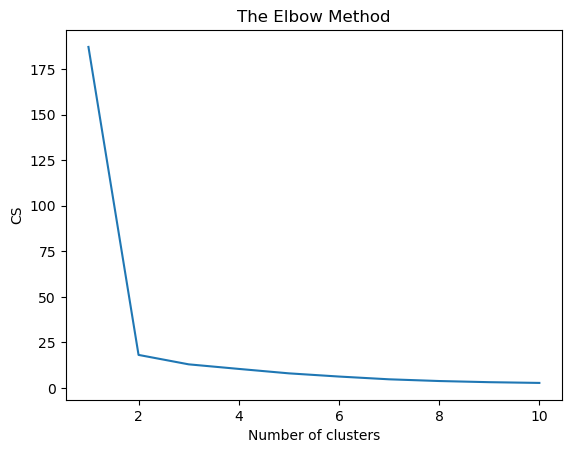

In [34]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

scaled_df['kmeans_cluster'] = kmeans.labels_

/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
scaled_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    666
1    203
Name: count, dtype: int64

/Users/richardaliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


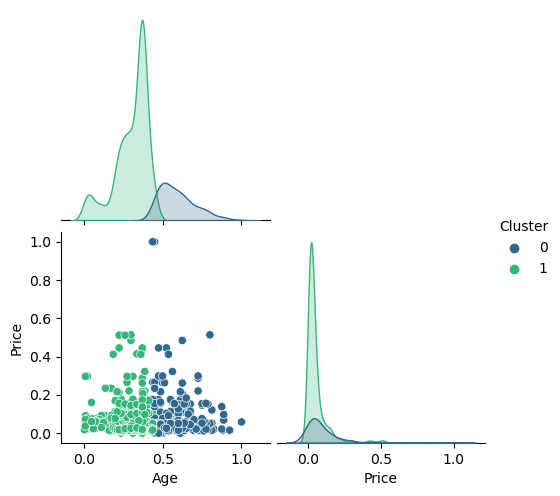

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


scaled_df['kmeans_cluster'] = scaled_df['kmeans_cluster'].astype('category')

# Create the pairplot
sns.pairplot(scaled_df, hue='Cluster', palette='viridis', corner=True)  # `corner=True` to plot only the lower triangle
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

silhouette_score(scaled_df.iloc[:,:2], kmeans.labels_)

0.5145816707136815

Comment: 
By using the Elbow Method, we figured out the K value or the optimal number of cluster to be 2. 2 is the point when the inertia stops decreasing as rapidy, which makes the trend to look like a elbow. A smaller K means larger cluster, which is more generalized. The result indicates that the price or spending habit might not be relative to customers' age. Pricing strategy may not differentiate across age groups. 